In [1]:

import ffmpeg
import cv2
import numpy as np
import os
from numpy.linalg import svd, inv
from matplotlib import pyplot as plt
from ArucoDetector import *
from pprint import pprint

In [2]:
# random calibration data
imsize = (1920, 1080)
# K = cv.getDefaultNewCameraMatrix(
    # np.diag([1920, 1920, 1]), imsize, True)
K = np.array([[1867, 0, 960], [0, 1575, 540], [0, 0, 1]])
print(K)
arDetector = ArUcoDetector(imsize, K)

[[1867    0  960]
 [   0 1575  540]
 [   0    0    1]]


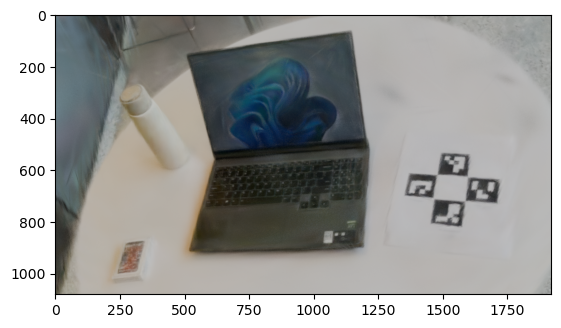

In [3]:
frame = cv2.imread("images/detected_marker_3.png")
# frame = cv2.imread("images/DICT_4X4_250_id_0123.png")
fig = plt.figure()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [4]:
# detect the marker
corners, ids, rejected = arDetector.detector.detectMarkers(frame)
print(ids.ravel())
pprint(corners)

[3 1]
(array([[[1600.,  632.],
        [1718.,  637.],
        [1712.,  730.],
        [1591.,  721.]]], dtype=float32),
 array([[[1373.,  614.],
        [1478.,  623.],
        [1463.,  707.],
        [1353.,  699.]]], dtype=float32))


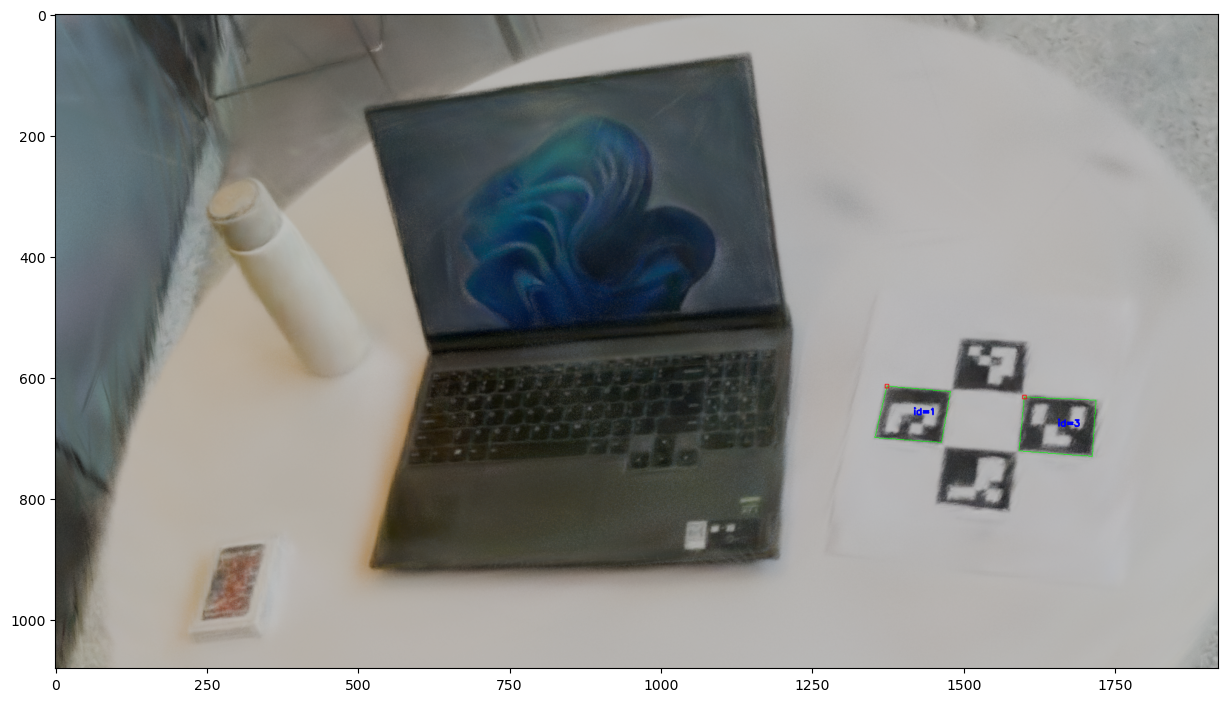

In [5]:
plt.figure(figsize=(15,15))
cv.aruco.drawDetectedMarkers(frame, corners, ids)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
# sort the corners by id
id_argsort = np.argsort(ids.ravel())
id_sorted = ids.ravel()[id_argsort]
corners_sorted = [corners[i] for i in id_argsort]

print(id_sorted)
pprint(corners_sorted)

[1 3]
[array([[[1373.,  614.],
        [1478.,  623.],
        [1463.,  707.],
        [1353.,  699.]]], dtype=float32),
 array([[[1600.,  632.],
        [1718.,  637.],
        [1712.,  730.],
        [1591.,  721.]]], dtype=float32)]


In [7]:

params = cv.aruco.EstimateParameters()
params.pattern = cv.aruco.ARUCO_CCW_CENTER

rvecs, tvecs = cv.aruco.estimatePoseSingleMarkers(
    corners_sorted, 6, K, None, None, None, None, params)[:2]

print("tvecs:")
pprint(tvecs.reshape(-1, 3))

print("rvecs: (deg)")
pprint(rvecs.reshape(-1, 3) / np.pi * 180)

tvecs:
array([[ 25.34784787,   7.92174607, 103.75556882],
       [ 37.04659284,   8.82210547,  99.58825068]])
rvecs: (deg)
array([[150.81143326,  12.93641431, -36.31407172],
       [155.55357016,   9.30110451, -34.23882091]])


In [8]:
# convert the rotation vector to rotation matrix
print(rvecs[0][0])

rvecs_mat = cv.Rodrigues(rvecs[0][0])
print("rvecs_mat:")
pprint(rvecs_mat[0])

[ 2.63215606  0.22578302 -0.63380012]
rvecs_mat:
array([[ 0.88278894,  0.2500285 , -0.39770521],
       [ 0.05772972, -0.89791887, -0.43635877],
       [-0.46620914,  0.36225329, -0.80710693]])


In [14]:
R_cv2blender = np.array([[1, 0, 0],
                         [0, -1, 0],
                         [0, 0, -1]])
R_rotx90 = np.array([[1, 0, 0],
                      [0, 0, -1],
                      [0, 1, 0]])
R_cv = np.array(rvecs_mat[0])
print("Mat_cv:")
pprint(R_cv)

Mat_blender = R_cv2blender @ R_cv @ R_rotx90
print("Mat_blender:")
pprint(Mat_blender)


Mat_cv:
array([[ 0.88278894,  0.2500285 , -0.39770521],
       [ 0.05772972, -0.89791887, -0.43635877],
       [-0.46620914,  0.36225329, -0.80710693]])
Mat_blender:
array([[ 0.88278894, -0.39770521, -0.2500285 ],
       [-0.05772972,  0.43635877, -0.89791887],
       [ 0.46620914,  0.80710693,  0.36225329]])


In [9]:
offset = np.mean(tvecs.reshape(-1, 3), axis=0)
# offset[0] *= -1
pprint(offset)

array([ 31.19722036,   8.37192577, 101.67190975])
